In [80]:
import pandas as pd
from cvxopt import matrix, solvers
import numpy as np
import matplotlib.pyplot as plt

# Solve the complete problem as a volatility-returns minmax problem:
# Cost function to minimize: w^TCw - w^Tmu = w^T(Cw - mu)

mean = pd.read_csv("mean.csv", names=['val'])
covar = pd.read_csv("covar.csv", names=list(range(12)))
covar.multiply(2.0)

P = matrix(covar.values.tolist())
q = matrix(list(map(lambda x: x * -1.0, mean['val'].tolist())))

G_holder = []
H_holder = []

for k in range(12):
    tmp = [0]*24
    tmp[2*k] = -1.0
    tmp[2*k + 1] = 1.0
    G_holder.append(tmp)

G = matrix(G_holder)

for k in range(24):
    if k % 2 == 0:
        H_holder.append(0.0)
    else:
        H_holder.append(1.0)

H = matrix(H_holder)

A = matrix([[1.0]]*12)
b = matrix(1.0)

sol = solvers.qp(P, q, G, H, A, b)

     pcost       dcost       gap    pres   dres
 0:  2.9175e+01  1.5063e+01  6e+01  2e+00  2e-15
 1:  2.9178e+01  2.3790e+01  8e+00  1e-01  1e-14
 2:  3.2011e+01  2.9284e+01  8e+00  6e-02  8e-15
 3:  3.5845e+01  3.3081e+01  1e+01  3e-02  6e-15
 4:  3.7156e+01  3.4441e+01  7e+00  2e-02  1e-14
 5:  5.4699e+01  3.3836e+01  4e+01  1e-02  2e-14
 6:  4.7457e+01  3.9237e+01  1e+01  3e-03  1e-14
 7:  5.3380e+01  4.3916e+01  2e+01  2e-03  4e-15
 8:  4.8441e+01  4.7452e+01  1e+00  2e-05  1e-14
 9:  4.7556e+01  4.7544e+01  1e-02  1e-07  3e-15
10:  4.7545e+01  4.7545e+01  1e-04  1e-09  8e-15
11:  4.7545e+01  4.7545e+01  1e-06  1e-11  2e-14
Optimal solution found.


In [81]:
print(sol['x'])
list(sol['x'])

[ 4.06e-02]
[ 8.14e-11]
[ 2.92e-11]
[ 1.04e-10]
[ 3.04e-01]
[ 3.83e-11]
[ 4.04e-11]
[ 5.58e-01]
[ 5.86e-02]
[ 1.15e-10]
[ 6.98e-10]
[ 3.86e-02]



[0.04056202773486769,
 8.138606161507094e-11,
 2.9234627871642773e-11,
 1.0439766302348244e-10,
 0.30449554428524767,
 3.834687168945212e-11,
 4.038248244932626e-11,
 0.5578076458072031,
 0.058582061098400987,
 1.1477726796345781e-10,
 6.975995772998158e-10,
 0.03855271996815597]

In [82]:
q_ra = matrix([0.0]*12)
# Solve a purely quadratic volatility reduction or risk averse strategy
sol_ra = solvers.qp(P, q_ra, G, H, A, b)

     pcost       dcost       gap    pres   dres
 0:  2.9632e+01  1.5577e+01  5e+01  2e+00  4e-13
 1:  2.9635e+01  2.4321e+01  8e+00  1e-01  9e-13
 2:  3.1790e+01  2.9326e+01  7e+00  6e-02  4e-13
 3:  3.4407e+01  3.3157e+01  7e+00  3e-02  1e-12
 4:  3.6294e+01  3.5197e+01  5e+00  1e-02  9e-13
 5:  5.5424e+01  3.2768e+01  4e+01  9e-03  4e-13
 6:  4.7663e+01  3.7893e+01  1e+01  3e-03  4e-12
 7:  5.2929e+01  4.2946e+01  2e+01  2e-03  5e-12
 8:  4.7889e+01  4.6823e+01  1e+00  4e-06  2e-12
 9:  4.6949e+01  4.6933e+01  2e-02  4e-08  2e-12
10:  4.6934e+01  4.6934e+01  2e-04  4e-10  1e-12
11:  4.6934e+01  4.6934e+01  2e-06  4e-12  2e-13
Optimal solution found.


In [83]:
print(sol_ra['x'])
list(sol_ra['x'])

[ 4.39e-02]
[ 4.06e-11]
[ 4.43e-11]
[ 1.75e-10]
[ 3.06e-01]
[ 7.53e-11]
[ 5.84e-11]
[ 5.56e-01]
[ 6.14e-02]
[ 1.50e-10]
[ 1.61e-09]
[ 3.27e-02]



[0.04385432279249014,
 4.062117746976489e-11,
 4.4297627330023084e-11,
 1.7512311441409164e-10,
 0.3063688903763737,
 7.525099003289814e-11,
 5.843397155080132e-11,
 0.5557028790809431,
 0.061389176424999393,
 1.4975904972502995e-10,
 1.6096350231068939e-09,
 0.03268472917207268]

In [96]:
# Plotting the frontier

# We need to generate stochastic row vectors. 
N_iter = 100000
stoch = np.random.rand(N_iter, 12)
stoch = stoch/stoch.sum(axis=1)[:,None].tolist()

mean_vector = mean['val'].values
cov_matrix = covar.values

exp_return = []
exp_volatility = []
wvec = []


for i in stoch:
    exp_return.append(np.dot(i, mean_vector))
    exp_volatility.append(np.sqrt(np.dot(i, np.dot(cov_matrix, np.transpose(i)))))
    wvec.append(i)

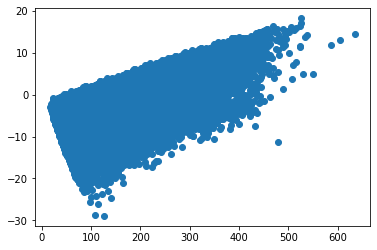

In [97]:
plt.scatter(exp_volatility, exp_return)
plt.show()